### 1.

Escoger un corpus de cualquier idioma y de un tamaño mayor a 10 000 tokens.

In [2]:
import nltk

nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/ldanieldesanpedro/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
from nltk.corpus import brown
sentences = brown.sents()
print(sentences[0])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


## 2. 

Limpiar los signos de puntuación, de admiración, de interrogación y cualquier elemento no léxico.

In [4]:
import re
#Creamos una función para identificar cadenas que contengan carácteres no alfa numéricos
def identify(word):
    result = re.findall(r'[^ a-z A-Z|-]', word)
    return len(result) == 0

#Probamos la función con algunas palabras
print(identify('hello!'))
print(identify('hello'))
print(identify('``'))
print(identify('.'))
print(identify('!'))
print(identify('Hello-there'))

In [7]:
# Limpiamos todo el corpus usando la función que acabamos de crear
cleaned_corpus = list(map(lambda word: list(filter(identify,word)),sentences))

# Comprobamos
print(cleaned_corpus[0])
print('-----')
print(sentences[0])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place']
-----
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


# 3.

In [8]:
from nltk.stem.snowball import SnowballStemmer

#Instanciamos el stemmer snowball 
stemmer = SnowballStemmer('english')

#Experimentamos un poco con el stemmer
print(stemmer.stem('executive'))
print(stemmer.stem('execution'))
print(stemmer.stem('execute'))


execut
execut
execut


In [10]:
#Aplicamos stemming a cada palabra de cada oracion en el corpus limpio
corpus_stemmed = list([list(map(stemmer.stem,sentence)) for sentence in cleaned_corpus])
#Observamos los stemms de una oración del corpus
print(corpus_stemmed[0])

['the', 'fulton', 'counti', 'grand', 'juri', 'said', 'friday', 'an', 'investig', 'of', 'recent', 'primari', 'elect', 'produc', 'no', 'evid', 'that', 'ani', 'irregular', 'took', 'place']


## 4.

In [12]:
#Juntamos todos los stemms de las oraciones en una sola collección
joined_stemms = [stemm for sentence in corpus_stemmed for stemm in sentence]


# Contamos las frecuencias de los stemms, y dichas frecuencias los vamos guardando en un diccionario
stemms = dict()

for (index,stemm) in zip(range(0,len(joined_stemms)),joined_stemms):
    print("\r index {} of {}".format(index,len(joined_stemms)), end = "\r")
    try:
        stemms[stemm] = stemms[stemm] + 1
    except KeyError:
        stemms[stemm] = 1

 index 1403 of 992136

In [13]:
#Observamos el resultado
print(stemms)

{'the': 69971, 'fulton': 17, 'counti': 190, 'grand': 54, 'juri': 68, 'said': 1961, 'friday': 63, 'an': 3740, 'investig': 131, 'of': 36413, 'recent': 302, 'primari': 98, 'elect': 171, 'produc': 256, 'no': 2139, 'evid': 290, 'that': 10594, 'ani': 1346, 'irregular': 27, 'took': 428, 'place': 823, 'further': 223, 'in': 21337, 'term-end': 1, 'present': 583, 'citi': 500, 'execut': 104, 'committe': 186, 'which': 3561, 'had': 5133, 'over-al': 35, 'charg': 232, 'deserv': 42, 'prais': 34, 'and': 28853, 'thank': 90, 'atlanta': 35, 'for': 9489, 'manner': 143, 'was': 9815, 'conduct': 134, 'september-octob': 1, 'term': 258, 'been': 2472, 'by': 5306, 'superior': 64, 'court': 286, 'judg': 127, 'durwood': 1, 'pye': 1, 'to': 26158, 'report': 457, 'possibl': 565, 'hard-fought': 2, 'won': 68, 'mayor-nomin': 1, 'ivan': 4, 'allen': 20, 'onli': 1748, 'a': 23195, 'relat': 459, 'hand': 781, 'such': 1303, 'receiv': 311, 'consid': 340, 'widespread': 30, 'interest': 603, 'number': 613, 'voter': 24, 'size': 154, '

## 5.

In [15]:
import math

#Ordenamos los stemms en funcion de su frecuencia
sorted_freq = sorted(stemms.values(), reverse = True)

##Obtenemos el logaritmo de las frecuencias
log_freq = map(lambda freq: math.log(freq),sorted_freq)
log_freq = list(log_freq)

##Creamos la lista con los rangos de las frecuencias
rang = list(range(1, len(log_freq) + 1))
##Sacamos el logaritmo de los rangos
log_rang = list(map(lambda rang: math.log(rang),rang))

## 6.

In [18]:
import matplotlib.pyplot as plt
plt.scatter(log_rang,log_freq)
plt.xLabel = 'Log Rangos'
plt.yLabel = 'Log Frecuencias'
plt.title = 'Curva ZIPF'
plt.show()

<Figure size 640x480 with 1 Axes>

## 7.

In [45]:
import numpy as np
import pandas as pd

rang = pd.DataFrame(data= log_rang, columns = ['rang'])
freq = pd.DataFrame(data= log_freq, columns = ['freq'])
joined_data = rang.join(freq)
cov = joined_data.cov()
alpha= cov['rang']['freq'] / cov['rang']['rang']
print(alpha)
print(np.array(log_rang)*alpha + log_freq[0])

-1.5006059748689142
[11.15583615 10.11569535  9.50725199 ... -4.26255292 -4.26260468
 -4.26265643]


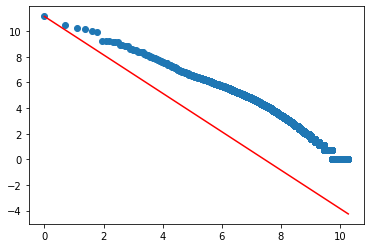

In [46]:
plt.xLabel = 'Log Rangos'
plt.yLabel = 'Log Frecuencias'
plt.title = 'Curva ZIPF'
plt.scatter(log_rang,log_freq)
plt.plot(log_rang, alpha*np.array(log_rang)+log_freq[0],c='r')
plt.show()